In [96]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import applications, optimizers

Using TensorFlow backend.


In [97]:
img_size = 224
batch_size = 32

In [98]:
%%time
train_datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip = True
        )

train_generator = train_datagen.flow_from_directory(
        './plates/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary')

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(  
        './plates',
        classes=['test'],
        target_size = (img_size, img_size),
        batch_size = 1,
        shuffle = False,        
        class_mode = None)    

Found 40 images belonging to 2 classes.
Found 744 images belonging to 1 classes.
Wall time: 233 ms


In [99]:
model = Sequential()
model.add(applications.ResNet50(include_top=False, pooling='avg'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False













94658560/94653016 [==============================] - 25s 0us/step

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [100]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.fit_generator(train_generator, steps_per_epoch=500, epochs=25, verbose=1)

In [86]:
test_generator.reset()
predict = model.predict_generator(test_generator, steps = len(test_generator.filenames))
len(predict)

Epoch 0/99:


C:\ProgramData\Anaconda3\envs\model\lib\site-packages\torch\optim\lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:02<00:08,  2.99s/it]





 50%|███████████████████████████████████████████████████████████████████▌    

train Loss: 0.8846 Acc: 0.4062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it]

val Loss: 0.6567 Acc: 0.5000
Epoch 1/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.86s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.24s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.82s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.38s/it]

train Loss: 0.6783 Acc: 0.5312









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.61s/it]

val Loss: 0.6239 Acc: 0.7500
Epoch 2/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.78s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.29s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.88s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.54s/it]

train Loss: 0.5433 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.85s/it]

val Loss: 0.6168 Acc: 0.5000
Epoch 3/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.80s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.26s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.90s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.50s/it]

train Loss: 0.6122 Acc: 0.6250









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.42s/it]

val Loss: 0.5880 Acc: 0.7500
Epoch 4/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.43s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:05,  2.97s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.69s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.42s/it]

train Loss: 0.5038 Acc: 0.7812









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.34s/it]

val Loss: 0.5725 Acc: 0.8750
Epoch 5/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.52s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:05,  2.99s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.62s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.29s/it]

train Loss: 0.4691 Acc: 0.7812









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.64s/it]

val Loss: 0.5677 Acc: 0.7500
Epoch 6/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.51s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:05,  3.00s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.69s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.36s/it]

train Loss: 0.4668 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.34s/it]

val Loss: 0.5708 Acc: 0.7500
Epoch 7/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.97s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.34s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.90s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.53s/it]

train Loss: 0.4875 Acc: 0.7812









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.40s/it]

val Loss: 0.5683 Acc: 0.7500
Epoch 8/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.71s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.21s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.74s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.41s/it]

train Loss: 0.4353 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.48s/it]

val Loss: 0.5719 Acc: 0.7500
Epoch 9/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.42s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:05,  2.98s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.71s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.45s/it]

train Loss: 0.3497 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.82s/it]

val Loss: 0.5745 Acc: 0.7500
Epoch 10/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.87s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.30s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.88s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.47s/it]

train Loss: 0.3639 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.75s/it]

val Loss: 0.5769 Acc: 0.7500
Epoch 11/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.71s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.15s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.72s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.33s/it]

train Loss: 0.4246 Acc: 0.7500









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.49s/it]

val Loss: 0.5776 Acc: 0.7500
Epoch 12/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.53s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.02s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.65s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.26s/it]

train Loss: 0.4118 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.99s/it]

val Loss: 0.5808 Acc: 0.7500
Epoch 13/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.07s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:06,  3.47s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:02,  2.99s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.56s/it]

train Loss: 0.3626 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.57s/it]

val Loss: 0.5857 Acc: 0.7500
Epoch 14/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.57s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.10s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.75s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.35s/it]

train Loss: 0.3778 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.41s/it]

val Loss: 0.5847 Acc: 0.7500
Epoch 15/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.61s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.14s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.75s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.45s/it]

train Loss: 0.3674 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.38s/it]

val Loss: 0.5830 Acc: 0.7500
Epoch 16/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.50s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.02s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.66s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.31s/it]

train Loss: 0.4021 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.58s/it]

val Loss: 0.5840 Acc: 0.7500
Epoch 17/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.41s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:05,  2.94s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.61s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.28s/it]

train Loss: 0.4144 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.25s/it]

val Loss: 0.5736 Acc: 0.7500
Epoch 18/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.01s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:06,  3.42s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.01s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.54s/it]

train Loss: 0.3914 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.28s/it]

val Loss: 0.5703 Acc: 0.7500
Epoch 19/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.50s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.13s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.71s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.41s/it]

train Loss: 0.3855 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.70s/it]

val Loss: 0.5729 Acc: 0.7500
Epoch 20/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:11,  3.72s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.20s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.88s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.54s/it]

train Loss: 0.3657 Acc: 1.0000









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.68s/it]

val Loss: 0.5735 Acc: 0.7500
Epoch 21/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:03<00:10,  3.48s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:05<00:06,  3.04s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:07<00:02,  2.79s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.63s/it]

train Loss: 0.3807 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.69s/it]

val Loss: 0.5724 Acc: 0.7500
Epoch 22/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.49s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.05s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:03,  3.96s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.60s/it]

train Loss: 0.4029 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.77s/it]

val Loss: 0.5754 Acc: 0.7500
Epoch 23/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.16s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.61s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.27s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.75s/it]

train Loss: 0.4049 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]

val Loss: 0.5676 Acc: 0.7500
Epoch 24/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:06<00:18,  6.14s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:10,  5.08s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.24s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.38s/it]

train Loss: 0.3908 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.33s/it]

val Loss: 0.5728 Acc: 0.7500
Epoch 25/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.97s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.14s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.58s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.96s/it]

train Loss: 0.3452 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.27s/it]

val Loss: 0.5729 Acc: 0.7500
Epoch 26/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.03s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.22s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.62s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  3.00s/it]

train Loss: 0.3606 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.30s/it]

val Loss: 0.5692 Acc: 0.7500
Epoch 27/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.66s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:07,  3.99s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.49s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.00s/it]

train Loss: 0.3776 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.20s/it]

val Loss: 0.5679 Acc: 0.7500
Epoch 28/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.89s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.26s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.82s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.47s/it]

train Loss: 0.3446 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.28s/it]

val Loss: 0.5667 Acc: 0.7500
Epoch 29/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:16,  5.38s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.49s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.87s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.24s/it]

train Loss: 0.4442 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.84s/it]

val Loss: 0.5648 Acc: 0.7500
Epoch 30/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.15s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.42s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:04,  4.02s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.49s/it]

train Loss: 0.3887 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.06s/it]

val Loss: 0.5679 Acc: 0.7500
Epoch 31/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:17,  5.87s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.93s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.18s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.38s/it]

train Loss: 0.3343 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.14s/it]

val Loss: 0.5701 Acc: 0.7500
Epoch 32/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.36s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.76s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.47s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.14s/it]

train Loss: 0.4176 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.13s/it]

val Loss: 0.5636 Acc: 0.7500
Epoch 33/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:16,  5.49s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.89s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.30s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.81s/it]

train Loss: 0.4022 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.62s/it]

val Loss: 0.5678 Acc: 0.7500
Epoch 34/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.21s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.31s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.78s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.13s/it]

train Loss: 0.3667 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.38s/it]

val Loss: 0.5729 Acc: 0.7500
Epoch 35/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.78s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.08s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.59s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.11s/it]

train Loss: 0.4076 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.05s/it]

val Loss: 0.5744 Acc: 0.7500
Epoch 36/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.31s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.63s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.18s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.78s/it]

train Loss: 0.3474 Acc: 1.0000









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.68s/it]

val Loss: 0.5761 Acc: 0.7500
Epoch 37/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.56s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.89s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.43s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.93s/it]

train Loss: 0.3517 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.65s/it]

val Loss: 0.5718 Acc: 0.7500
Epoch 38/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.84s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.10s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.60s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.08s/it]

train Loss: 0.3810 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.38s/it]

val Loss: 0.5782 Acc: 0.7500
Epoch 39/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.31s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.66s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.25s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.75s/it]

train Loss: 0.3488 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.29s/it]

val Loss: 0.5807 Acc: 0.7500
Epoch 40/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.05s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:06,  3.43s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.01s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

train Loss: 0.3575 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.85s/it]

val Loss: 0.5856 Acc: 0.7500
Epoch 41/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.35s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.76s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.30s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.90s/it]

train Loss: 0.3664 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.29s/it]

val Loss: 0.5823 Acc: 0.7500
Epoch 42/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.03s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.23s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.71s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.19s/it]

train Loss: 0.3452 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.73s/it]

val Loss: 0.5766 Acc: 0.7500
Epoch 43/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.89s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.18s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.64s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.11s/it]

train Loss: 0.4034 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.70s/it]

val Loss: 0.5695 Acc: 0.7500
Epoch 44/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.50s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.85s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.37s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.90s/it]

train Loss: 0.3930 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.42s/it]

val Loss: 0.5642 Acc: 0.7500
Epoch 45/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.60s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:07,  3.96s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.49s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.02s/it]

train Loss: 0.3813 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.66s/it]

val Loss: 0.5636 Acc: 0.7500
Epoch 46/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.64s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.94s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.46s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.94s/it]

train Loss: 0.3476 Acc: 1.0000









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.50s/it]

val Loss: 0.5671 Acc: 0.7500
Epoch 47/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.48s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.83s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.36s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.87s/it]

train Loss: 0.3455 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]

val Loss: 0.5717 Acc: 0.7500
Epoch 48/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.46s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.79s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.33s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.85s/it]

train Loss: 0.3763 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]

val Loss: 0.5599 Acc: 0.8750
Epoch 49/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.41s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.75s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.32s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.86s/it]

train Loss: 0.3556 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.41s/it]

val Loss: 0.5626 Acc: 0.8750
Epoch 50/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.46s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:07,  3.91s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.51s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.12s/it]

train Loss: 0.3939 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.88s/it]

val Loss: 0.5630 Acc: 0.7500
Epoch 51/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.50s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.81s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.32s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.85s/it]

train Loss: 0.3641 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.25s/it]

val Loss: 0.5648 Acc: 0.7500
Epoch 52/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.44s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.81s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.35s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.91s/it]

train Loss: 0.3750 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.82s/it]

val Loss: 0.5726 Acc: 0.7500
Epoch 53/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.79s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.06s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.57s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.09s/it]

train Loss: 0.3377 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.39s/it]

val Loss: 0.5710 Acc: 0.7500
Epoch 54/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.69s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.02s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.48s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.02s/it]

train Loss: 0.3624 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.99s/it]

val Loss: 0.5768 Acc: 0.7500
Epoch 55/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.22s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.57s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.17s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.79s/it]

train Loss: 0.3989 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.08s/it]

val Loss: 0.5772 Acc: 0.7500
Epoch 56/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.29s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.69s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.27s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.86s/it]

train Loss: 0.4309 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.30s/it]

val Loss: 0.5757 Acc: 0.7500
Epoch 57/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.16s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.58s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.14s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.73s/it]

train Loss: 0.4587 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.36s/it]

val Loss: 0.5737 Acc: 0.7500
Epoch 58/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.18s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.54s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.16s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.83s/it]

train Loss: 0.3901 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.74s/it]

val Loss: 0.5767 Acc: 0.7500
Epoch 59/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.33s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.74s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.29s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.82s/it]

train Loss: 0.4246 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]

val Loss: 0.5752 Acc: 0.7500
Epoch 60/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.20s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.45s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:04,  4.03s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.63s/it]

train Loss: 0.4261 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.13s/it]

val Loss: 0.5725 Acc: 0.7500
Epoch 61/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:16,  5.47s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.60s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.96s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.32s/it]

train Loss: 0.3526 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]

val Loss: 0.5659 Acc: 0.7500
Epoch 62/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.03s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.27s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.69s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.06s/it]

train Loss: 0.3402 Acc: 1.0000









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.32s/it]

val Loss: 0.5703 Acc: 0.7500
Epoch 63/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.96s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.15s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.62s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.03s/it]

train Loss: 0.3476 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.44s/it]

val Loss: 0.5740 Acc: 0.7500
Epoch 64/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.93s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.16s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.55s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.99s/it]

train Loss: 0.3834 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.40s/it]

val Loss: 0.5811 Acc: 0.7500
Epoch 65/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.23s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.39s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.87s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.26s/it]

train Loss: 0.3735 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.99s/it]

val Loss: 0.5801 Acc: 0.7500
Epoch 66/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:16,  5.43s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.60s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.96s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.34s/it]

train Loss: 0.3459 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.96s/it]

val Loss: 0.5802 Acc: 0.7500
Epoch 67/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.96s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.15s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.61s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.11s/it]

train Loss: 0.3534 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.83s/it]

val Loss: 0.5806 Acc: 0.7500
Epoch 68/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.96s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.20s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.66s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.20s/it]

train Loss: 0.3427 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.46s/it]

val Loss: 0.5780 Acc: 0.7500
Epoch 69/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.85s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.15s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.65s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.14s/it]

train Loss: 0.4037 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.26s/it]

val Loss: 0.5765 Acc: 0.7500
Epoch 70/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.31s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.72s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.40s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.05s/it]

train Loss: 0.4277 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]

val Loss: 0.5771 Acc: 0.7500
Epoch 71/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.92s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.22s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.73s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.19s/it]

train Loss: 0.3900 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.64s/it]

val Loss: 0.5730 Acc: 0.7500
Epoch 72/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.82s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.18s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.59s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.10s/it]

train Loss: 0.3900 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.25s/it]

val Loss: 0.5730 Acc: 0.7500
Epoch 73/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.56s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.00s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.53s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.03s/it]

train Loss: 0.3630 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.06s/it]

val Loss: 0.5846 Acc: 0.7500
Epoch 74/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.65s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.06s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.50s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.01s/it]

train Loss: 0.3780 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.05s/it]

val Loss: 0.5818 Acc: 0.7500
Epoch 75/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:12,  4.20s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.73s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.30s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.90s/it]

train Loss: 0.4255 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.98s/it]

val Loss: 0.5711 Acc: 0.7500
Epoch 76/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.72s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.12s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.58s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.10s/it]

train Loss: 0.3493 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.43s/it]

val Loss: 0.5696 Acc: 0.7500
Epoch 77/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.85s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.19s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.61s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.10s/it]

train Loss: 0.3757 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.07s/it]

val Loss: 0.5665 Acc: 0.7500
Epoch 78/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.70s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.04s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.46s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.97s/it]

train Loss: 0.4107 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.07s/it]

val Loss: 0.5685 Acc: 0.7500
Epoch 79/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.82s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.16s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.69s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.21s/it]

train Loss: 0.3552 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.45s/it]

val Loss: 0.5734 Acc: 0.7500
Epoch 80/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.89s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.22s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.74s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.23s/it]

train Loss: 0.3335 Acc: 0.9688









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.14s/it]

val Loss: 0.5724 Acc: 0.7500
Epoch 81/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:17,  5.70s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.87s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:12<00:04,  4.44s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:17<00:00,  4.31s/it]

train Loss: 0.3626 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.74s/it]

val Loss: 0.5727 Acc: 0.7500
Epoch 82/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.89s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.17s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.81s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.37s/it]

train Loss: 0.3843 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.36s/it]

val Loss: 0.5816 Acc: 0.7500
Epoch 83/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.69s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.05s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.59s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.07s/it]

train Loss: 0.4263 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.27s/it]

val Loss: 0.5841 Acc: 0.7500
Epoch 84/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:16,  5.43s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:09<00:09,  4.99s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.24s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.72s/it]

train Loss: 0.3996 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.16s/it]

val Loss: 0.5767 Acc: 0.7500
Epoch 85/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:06<00:18,  6.16s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:09<00:10,  5.17s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.41s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.59s/it]

train Loss: 0.3485 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]

val Loss: 0.5697 Acc: 0.7500
Epoch 86/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:16,  5.46s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:09,  4.58s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:03,  3.97s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.30s/it]

train Loss: 0.3726 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.25s/it]

val Loss: 0.5707 Acc: 0.7500
Epoch 87/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.01s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.18s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.60s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.04s/it]

train Loss: 0.3689 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.50s/it]

val Loss: 0.5691 Acc: 0.7500
Epoch 88/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.48s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.81s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:08<00:03,  3.34s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.94s/it]

train Loss: 0.3548 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.31s/it]

val Loss: 0.5677 Acc: 0.8750
Epoch 89/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:06<00:18,  6.24s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:10,  5.15s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.42s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.65s/it]

train Loss: 0.3538 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.78s/it]

val Loss: 0.5772 Acc: 0.7500
Epoch 90/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.58s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:07,  3.94s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.56s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.08s/it]

train Loss: 0.3645 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.32s/it]

val Loss: 0.5759 Acc: 0.7500
Epoch 91/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.50s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:07,  3.90s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.49s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.06s/it]

train Loss: 0.3992 Acc: 0.8750









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.49s/it]

val Loss: 0.5689 Acc: 0.7500
Epoch 92/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.69s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.10s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.51s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.97s/it]

train Loss: 0.3784 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.12s/it]

val Loss: 0.5718 Acc: 0.7500
Epoch 93/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:05<00:15,  5.27s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:09,  4.78s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.12s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.58s/it]

train Loss: 0.4199 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.27s/it]

val Loss: 0.5724 Acc: 0.7500
Epoch 94/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:06<00:18,  6.21s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:10,  5.09s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:10<00:04,  4.23s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.32s/it]

train Loss: 0.3911 Acc: 0.8438









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.33s/it]

val Loss: 0.5769 Acc: 0.7500
Epoch 95/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.77s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:08,  4.00s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.41s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.94s/it]

train Loss: 0.4355 Acc: 0.8125









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.32s/it]

val Loss: 0.5773 Acc: 0.7500
Epoch 96/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:06<00:18,  6.09s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:08<00:10,  5.04s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:11<00:04,  4.26s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.51s/it]

train Loss: 0.3734 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.99s/it]

val Loss: 0.5857 Acc: 0.7500
Epoch 97/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:13,  4.51s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:06<00:07,  3.87s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.41s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.98s/it]

train Loss: 0.3763 Acc: 0.9375









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.56s/it]

val Loss: 0.5851 Acc: 0.7500
Epoch 98/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.82s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.12s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.55s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.02s/it]

train Loss: 0.3869 Acc: 0.9062









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.41s/it]

val Loss: 0.5802 Acc: 0.7500
Epoch 99/99:









  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:04<00:14,  4.85s/it]





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:07<00:08,  4.10s/it]





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:09<00:03,  3.53s/it]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.07s/it]

train Loss: 0.4229 Acc: 0.7812









  0%|                                                                                                                                               | 0/1 [00:00<?, ?it/s]





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.50s/it]

val Loss: 0.5729 Acc: 0.7500


In [88]:
sub_df = pd.read_csv('/kaggle/input/platesv2/sample_submission.csv')
sub_df.head()
sub_df['label'] = predict
sub_df['label'] = sub_df['label'].apply(lambda x: 'dirty' if x > 0.5 else 'cleaned')
sub_df.head()


FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: 'test\\unknown'

In [89]:
sub_df['label'].value_counts()
sub_df.to_csv('sub.csv', index=False)







  0%|                                                                                                                                              | 0/93 [00:00<?, ?it/s]





  1%|█▍                                                                                                                                    | 1/93 [00:01<02:44,  1.79s/it]





  2%|██▉                                                                                                                                   | 2/93 [00:03<02:40,  1.77s/it]





  3%|████▎                                                                                                                                 | 3/93 [00:05<02:37,  1.75s/it]





  4%|█████▊                                                                                                                                | 4/93 [00:07<02:39,  1.79s/it]





  5%|███████▏                                                                                                     

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 84/93 [02:51<00:17,  1.96s/it]





 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 85/93 [02:53<00:14,  1.86s/it]





 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 86/93 [02:55<00:12,  1.78s/it]





 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 87/93 [02:56<00:10,  1.74s/it]





 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 88/93 [02:58<00:08,  1.72s/it]





 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████

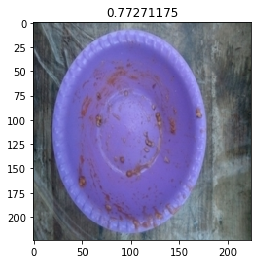

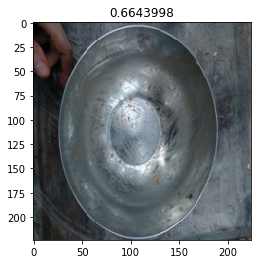

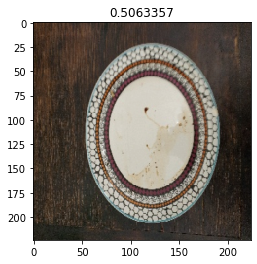

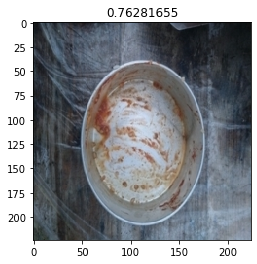

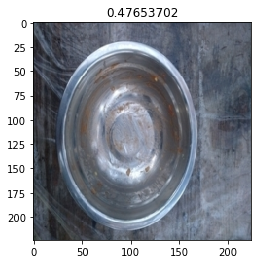

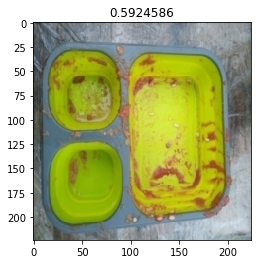

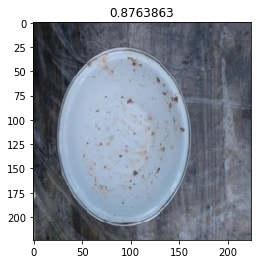

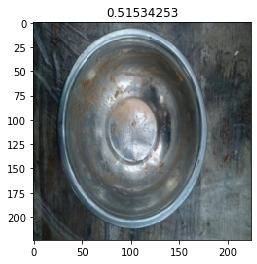

,label
id,
0000,dirty
0001,dirty
0002,dirty
0003,dirty
0004,cleaned
0005,dirty


,label
id,
0000,dirty
0001,dirty
0002,dirty
0003,dirty
0004,cleaned
